In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#set seaborn style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
sns.palettes.DEFAULT_COLORS = sns.color_palette("Paired")

In [3]:
df_cus = pd.read_csv('Dim_customer.csv')
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number
0,1,3,M,Kelly Key,5/29/1950,Venus@adipiscing.edu,1/4/2017,908-424-2890
1,2,3,M,Clark Schroeder,7/30/1950,Nora@fames.gov,1/7/2017,032-732-6308
2,3,3,M,Elvis Cardenas,9/30/1950,Brianna@tellus.edu,1/10/2017,459-375-9187
3,4,3,M,Rafael Estes,12/1/1950,Ina@non.gov,1/13/2017,576-640-9226
4,5,3,M,Colin Lynn,2/1/1951,Dale@Integer.com,1/15/2017,344-674-6569


In [4]:
#convert date
df_cus['birthdate'] = pd.to_datetime(df_cus['birthdate'])
df_cus['customer_since'] = pd.to_datetime(df_cus['customer_since'])

In [7]:
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number
0,1,3,M,Kelly Key,1950-05-29,Venus@adipiscing.edu,2017-01-04,908-424-2890
1,2,3,M,Clark Schroeder,1950-07-30,Nora@fames.gov,2017-01-07,032-732-6308
2,3,3,M,Elvis Cardenas,1950-09-30,Brianna@tellus.edu,2017-01-10,459-375-9187
3,4,3,M,Rafael Estes,1950-12-01,Ina@non.gov,2017-01-13,576-640-9226
4,5,3,M,Colin Lynn,1951-02-01,Dale@Integer.com,2017-01-15,344-674-6569


# Demographic

## Age

In [5]:
#Calculate age
df_cus['age'] = df_cus['birthdate'].apply(lambda x: 2023 - x.year)
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,age
0,1,3,M,Kelly Key,1950-05-29,Venus@adipiscing.edu,2017-01-04,908-424-2890,73
1,2,3,M,Clark Schroeder,1950-07-30,Nora@fames.gov,2017-01-07,032-732-6308,73
2,3,3,M,Elvis Cardenas,1950-09-30,Brianna@tellus.edu,2017-01-10,459-375-9187,73
3,4,3,M,Rafael Estes,1950-12-01,Ina@non.gov,2017-01-13,576-640-9226,73
4,5,3,M,Colin Lynn,1951-02-01,Dale@Integer.com,2017-01-15,344-674-6569,72


In [24]:
df_cus.duplicated(subset='customer_id').sum()

0

In [6]:
df_cus[['age']].describe()

,age
count,2251.000000
mean,44.609507
std,14.910664
min,22.000000
25%,32.000000
50%,42.000000
75%,57.500000
max,73.000000


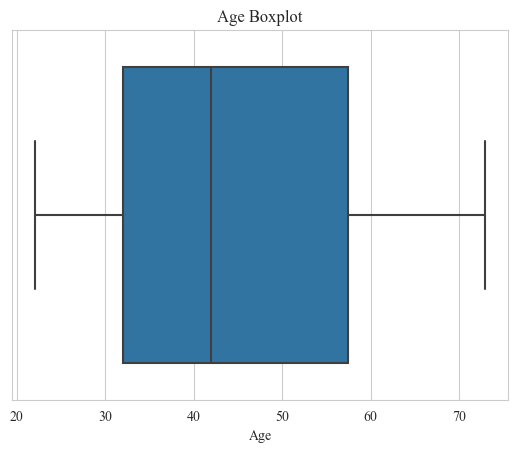

In [22]:
#Boxplot for age
sns.boxplot(x=df_cus['age'])
#set title
plt.title('Age Boxplot')
#set x label
plt.xlabel('Age')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_42328\621439510.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cus['age'], hist=True, kde=True, kde_kws={'linewidth': 3}, color='blue', hist_kws={'edgecolor': 'black'})


<Axes: xlabel='age', ylabel='Density'>

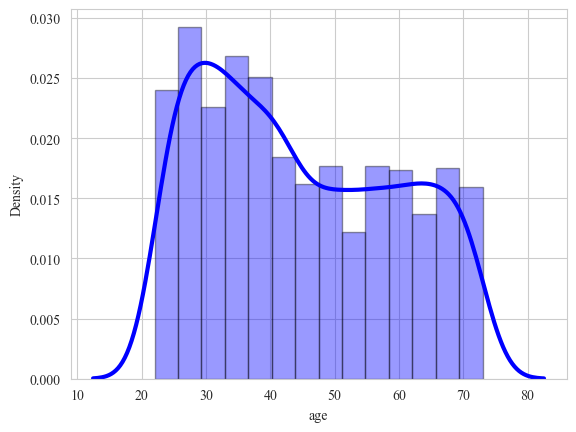

In [11]:
#Histogram for age with line and bar different color
sns.distplot(df_cus['age'], hist=True, kde=True, kde_kws={'linewidth': 3}, color='blue', hist_kws={'edgecolor': 'black'})

In [40]:
# Create a new column for age group
df_cus['age_group'] = pd.cut(df_cus['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70'])
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,age,customer_years,age_group
0,1,3,M,Kelly Key,1950-05-29,Venus@adipiscing.edu,2017-01-04,908-424-2890,73,6,>70
1,2,3,M,Clark Schroeder,1950-07-30,Nora@fames.gov,2017-01-07,032-732-6308,73,6,>70
2,3,3,M,Elvis Cardenas,1950-09-30,Brianna@tellus.edu,2017-01-10,459-375-9187,73,6,>70
3,4,3,M,Rafael Estes,1950-12-01,Ina@non.gov,2017-01-13,576-640-9226,73,6,>70
4,5,3,M,Colin Lynn,1951-02-01,Dale@Integer.com,2017-01-15,344-674-6569,72,6,>70


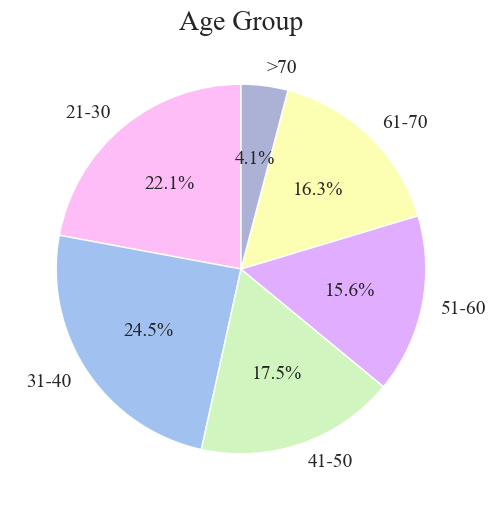

In [46]:
#Pie plot for age group
fig, ax = plt.subplots(figsize=(6, 6))
sizes = df_cus.groupby('age_group').size()
if (sizes == 0).any():
    sizes = sizes[sizes != 0]
sizes.plot(kind='pie', autopct='%1.1f%%', colors=['#FFBDF7', '#A1C2F1', '#D0F5BE','#E1AEFF','#FCFFB2','#ACB1D6'], 
           textprops={'fontsize': 14}, startangle=90, ax=ax)
ax.set_ylabel('')
ax.set_title('Age Group', fontsize=20)
plt.show()

## Gender

In [12]:
df_cus['gender'].value_counts()

F                977
M                727
Not Specified    547
Name: gender, dtype: int64

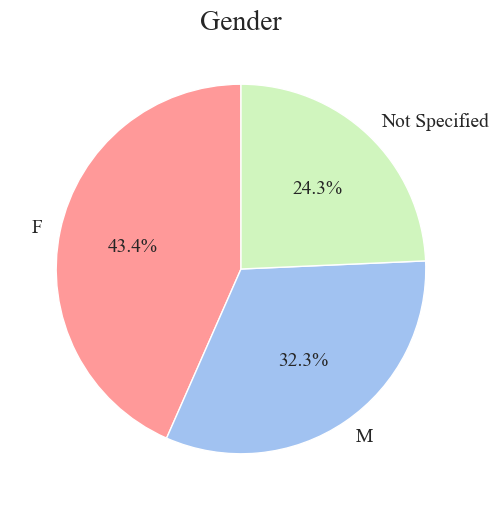

In [20]:
#Pie plot for gender
fix, ax = plt.subplots(figsize=(6, 6))
df_cus.groupby('gender').size().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#A1C2F1', '#D0F5BE' ], textprops={'fontsize': 14}, startangle=90, ax=ax)
ax.set_ylabel('')
ax.set_title('Gender', fontsize=20)
plt.show()

In [108]:
df_cus['gender'].value_counts()

F                977
M                727
Not Specified    547
Name: gender, dtype: int64

## Gender and Age

[[112 146 138 138 155  38]
 [162 191 190 194 191  49]
 [223 214  65  20  20   5]]


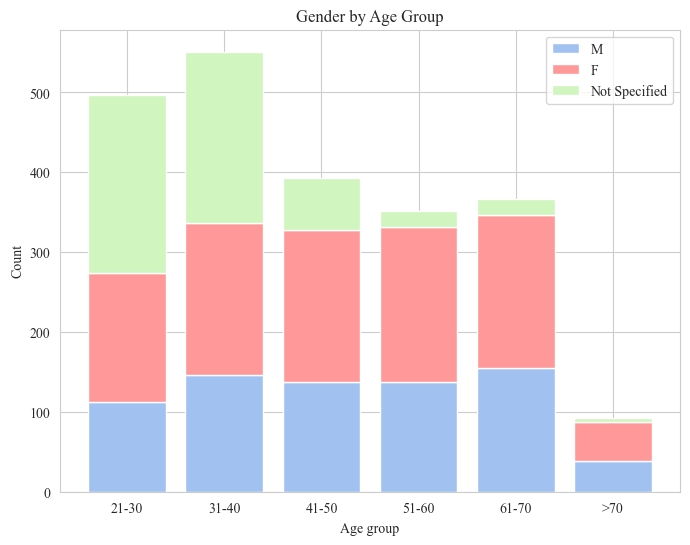

In [92]:
#stacked bar chart for age group and gender
fig, ax = plt.subplots(figsize=(8,6))

age_groups = df_cus['age_group'].unique()[::-1]
genders = df_cus['gender'].unique()
colors=[ '#A1C2F1','#ff9999', '#D0F5BE']
counts = []
for i, gender in enumerate(genders):
    counts.append([df_cus[(df_cus['gender'] == gender) & (df_cus['age_group'] == age_group)].shape[0] for age_group in age_groups])
counts = np.array(counts)
print(counts)
ax.bar(age_groups, counts[0], color = colors[0], label = genders[0])
ax.bar(age_groups, counts[1], bottom = counts[0], color = colors[1], label = genders[1])
ax.bar(age_groups, counts[2], bottom = counts[0] + counts[1], color = colors[2], label = genders[2])
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend()
plt.title('Gender by Age Group')
plt.show()

In [84]:
df_gender = pd.pivot_table(df_cus,columns=['age_group','gender'],values='customer_id',aggfunc='count').T.reset_index()
df_gender

,age_group,gender,customer_id
0,0-20,F,0
1,0-20,M,0
2,0-20,Not Specified,0
3,21-30,F,162
4,21-30,M,112
5,21-30,Not Specified,223
6,31-40,F,191
7,31-40,M,146
8,31-40,Not Specified,214
9,41-50,F,190


## Enrollment age

In [25]:
#customer years
df_cus['customer_years'] = df_cus['customer_since'].apply(lambda x: 2023 - x.year)
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,age,customer_years
0,1,3,M,Kelly Key,1950-05-29,Venus@adipiscing.edu,2017-01-04,908-424-2890,73,6
1,2,3,M,Clark Schroeder,1950-07-30,Nora@fames.gov,2017-01-07,032-732-6308,73,6
2,3,3,M,Elvis Cardenas,1950-09-30,Brianna@tellus.edu,2017-01-10,459-375-9187,73,6
3,4,3,M,Rafael Estes,1950-12-01,Ina@non.gov,2017-01-13,576-640-9226,73,6
4,5,3,M,Colin Lynn,1951-02-01,Dale@Integer.com,2017-01-15,344-674-6569,72,6


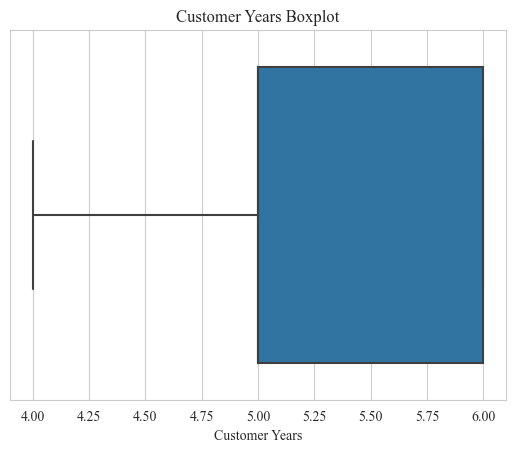

In [26]:
#Boxplot for customer years
sns.boxplot(x=df_cus['customer_years'])
#set title
plt.title('Customer Years Boxplot')
#set x label
plt.xlabel('Customer Years')
plt.show()

In [31]:
df_cus['customer_years'].value_counts()

6    991
5    988
4    272
Name: customer_years, dtype: int64

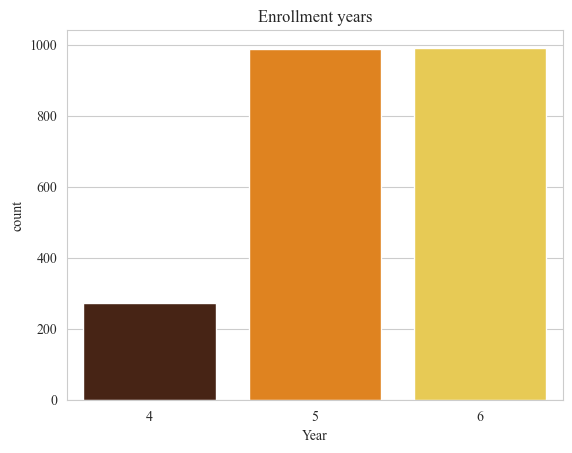

In [105]:
#barplot for customer years
color=['#4F200D', '#FF8400', '#FFD93D']
sns.countplot(x=df_cus['customer_years'], palette=color)
#set title
plt.title('Enrollment years')
#set x label
plt.xlabel('Year')
plt.show()

In [93]:
#start age of customer
df_cus['start_age'] = df_cus['age'] - df_cus['customer_years']
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,age,customer_years,age_group,start_age
0,1,3,M,Kelly Key,1950-05-29,Venus@adipiscing.edu,2017-01-04,908-424-2890,73,6,>70,67
1,2,3,M,Clark Schroeder,1950-07-30,Nora@fames.gov,2017-01-07,032-732-6308,73,6,>70,67
2,3,3,M,Elvis Cardenas,1950-09-30,Brianna@tellus.edu,2017-01-10,459-375-9187,73,6,>70,67
3,4,3,M,Rafael Estes,1950-12-01,Ina@non.gov,2017-01-13,576-640-9226,73,6,>70,67
4,5,3,M,Colin Lynn,1951-02-01,Dale@Integer.com,2017-01-15,344-674-6569,72,6,>70,66


In [94]:
#start_age_group
df_cus['start_age_group'] = pd.cut(df_cus['start_age'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70'])
df_cus.head()

,customer_id,home_store,gender,customer_first-name,birthdate,customer_email,customer_since,loyalty_card_number,age,customer_years,age_group,start_age,start_age_group
0,1,3,M,Kelly Key,1950-05-29,Venus@adipiscing.edu,2017-01-04,908-424-2890,73,6,>70,67,61-70
1,2,3,M,Clark Schroeder,1950-07-30,Nora@fames.gov,2017-01-07,032-732-6308,73,6,>70,67,61-70
2,3,3,M,Elvis Cardenas,1950-09-30,Brianna@tellus.edu,2017-01-10,459-375-9187,73,6,>70,67,61-70
3,4,3,M,Rafael Estes,1950-12-01,Ina@non.gov,2017-01-13,576-640-9226,73,6,>70,67,61-70
4,5,3,M,Colin Lynn,1951-02-01,Dale@Integer.com,2017-01-15,344-674-6569,72,6,>70,66,61-70


[[112 146 138 138 155]
 [162 191 190 194 191]
 [223 214  65  20  20]]


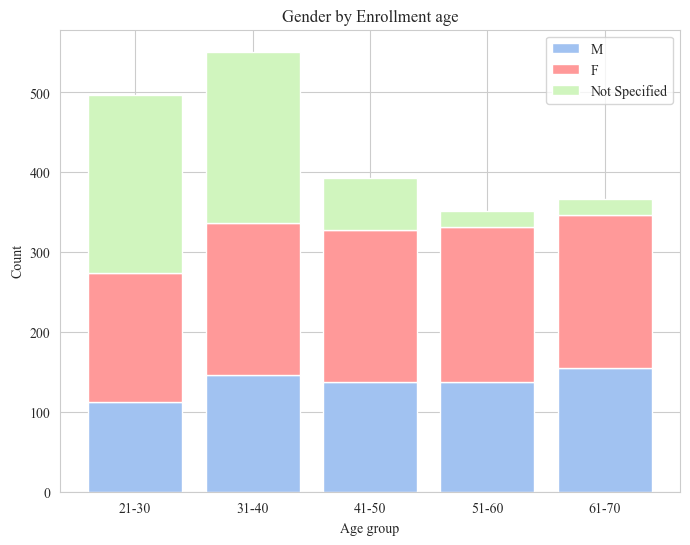

In [98]:
#stacked bar chart for start_age_group and gender
fig, ax = plt.subplots(figsize=(8,6))
start_age_group = df_cus['start_age_group'].unique()[::-1][1:]
genders = df_cus['gender'].unique()
colors=[ '#A1C2F1','#ff9999', '#D0F5BE']
counts = []
for i, gender in enumerate(genders):
    counts.append([df_cus[(df_cus['gender'] == gender) & (df_cus['age_group'] == age_group)].shape[0] for age_group in start_age_group])
counts = np.array(counts)
print(counts)
ax.bar(start_age_group, counts[0], color = colors[0], label = genders[0])
ax.bar(start_age_group, counts[1], bottom = counts[0], color = colors[1], label = genders[1])
ax.bar(start_age_group, counts[2], bottom = counts[0] + counts[1], color = colors[2], label = genders[2])
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend()
plt.title('Gender by Enrollment age')
plt.show()

In [110]:
df_gender = pd.pivot_table(df_cus, columns=['start_age_group','gender'], values='customer_id', aggfunc='count').T.reset_index()
df_gender

,start_age_group,gender,customer_id
0,0-20,F,56
1,0-20,M,32
2,0-20,Not Specified,80
3,21-30,F,207
4,21-30,M,155
5,21-30,Not Specified,279
6,31-40,F,184
7,31-40,M,143
8,31-40,Not Specified,133
9,41-50,F,211


# Transaction

In [107]:
df_sales = pd.read_csv('Historical_sales2022 .csv')